In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To load the dataset
df = pd.read_csv("titanic.csv")

#to show first 5 records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Total number of rows and columns
df.shape

(891, 12)

In [4]:
#To check null value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

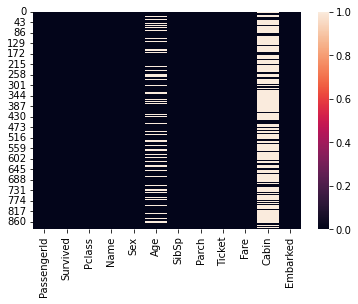

In [5]:
#Visualization of missing data
sb.heatmap(df.isnull())
plt.show()

In [6]:
#the cabin column as more than 50% data null, so will delete the column instead of replacing the
#values in column
df.drop('Cabin',axis=1,inplace=True)  #inplace=True for permanent change

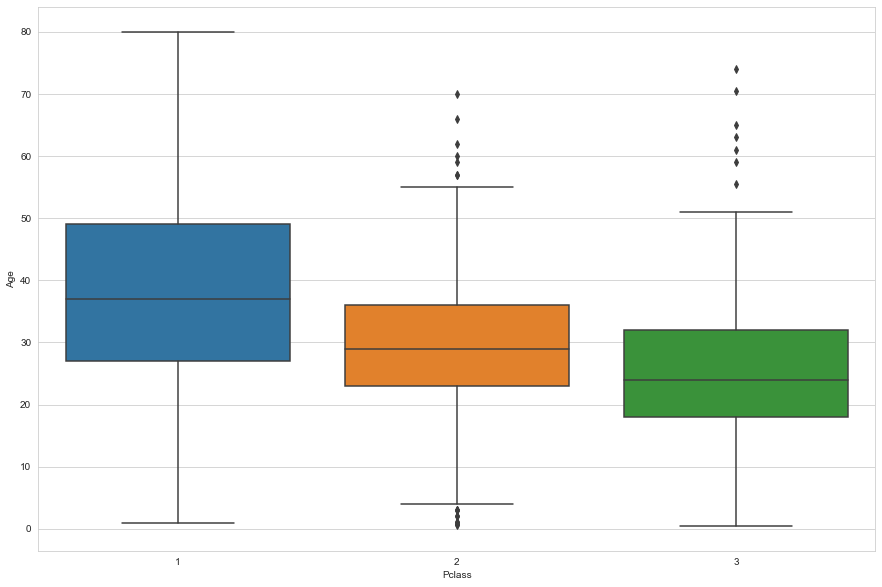

In [7]:
#now age column as approximate 20% data null so we replace the null value
#to check pclass with age by using box plot
plt.figure(figsize=(15,10))
sb.set_style('whitegrid')
sb.boxplot(data=df,x="Pclass",y="Age")
plt.show()

In [8]:
#from above box plot we get that around age 37 the pclass=1,
#around age 29 the pclass=2 and around age=24 the pclass=3
#we use this average age value to impute based on pclass for age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): 
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
#Now call the function
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

In [10]:
#Now check the null value 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
#Embarked as only 2 null value so we delete that rows
df.dropna(inplace=True)

In [12]:
#Now check the null value again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
#cross check the null value by data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [14]:
#To check the duplicated values
df.duplicated().sum()

0

In [15]:
#Machine always accept the numerical datatypes(int/float) 
#which means machine will not take categorical datatypes
#To convert categorical datatype to numerical datatype we use LabelEncoder
#call inbuilt class 
from sklearn.preprocessing import LabelEncoder

In [16]:
#create an object by spliting the datatypes
df_num = df.select_dtypes(["int64","float64"])  #hold all columns with int and float
df_cat = df.select_dtypes(object)   #hold object type columns

In [17]:
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [18]:
df_cat.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [19]:
#Apply LabelEncoder to df_cat to convert object datatype to numerical datatype
#create an object for LabelEncoder class
le = LabelEncoder()

In [20]:
#by using for loop
for col in df_cat:
    df_cat[col] = le.fit_transform(df_cat[col])

In [21]:
#to check 
df_cat.dtypes

Name        int32
Sex         int32
Ticket      int32
Embarked    int32
dtype: object

In [22]:
#Now merge/joint the both datatype (df_num,df_cat)
df = pd.concat([df_num,df_cat],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,108,1,522,2
1,2,1,1,38.0,1,0,71.2833,190,0,595,0
2,3,1,3,26.0,0,0,7.9250,353,0,668,2
3,4,1,1,35.0,1,0,53.1000,272,0,48,2
4,5,0,3,35.0,0,0,8.0500,15,1,471,2


In [23]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Name             int32
Sex              int32
Ticket           int32
Embarked         int32
dtype: object

In [24]:
#we have calssification dataset which means we solve this with classification algorithm
#1. use Logistic Regression

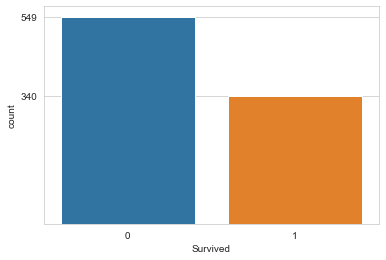

0    549
1    340
Name: Survived, dtype: int64

In [25]:
#How many categories in output variable
f = df["Survived"].value_counts()
sb.countplot(data=df,x="Survived")
plt.yticks(f)
plt.show()
f

In [26]:
#Select input and output
x = df.drop("Survived",axis=1)   #input 
y = df["Survived"]               #output

In [27]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,3,22.0,1,0,7.2500,108,1,522,2
1,2,1,38.0,1,0,71.2833,190,0,595,0
2,3,3,26.0,0,0,7.9250,353,0,668,2
3,4,1,35.0,1,0,53.1000,272,0,48,2
4,5,3,35.0,0,0,8.0500,15,1,471,2


In [28]:
#Now Split the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
x_train.shape , x_test.shape

((622, 10), (267, 10))

In [30]:
#Applying StandardScaler on x_train and x_test
from sklearn.preprocessing import StandardScaler

#create an object for StandardScaler class
ss = StandardScaler()

In [31]:
#train the model
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [32]:
#create a function
def create_model(model):
    model.fit(x_train,y_train)    #train the model with 70% data
    y_pred = model.predict(x_test) #test the model with 30% data
    
    #generate Report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    
    return model

In [33]:
#call the class 
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
#Perform the base model that is Linaer Regression
from sklearn.linear_model import LogisticRegression

In [35]:
#Create an object for LinearRegression class
lr = LogisticRegression(random_state=1)

In [36]:
#call function
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       166
           1       0.78      0.79      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267

[[144  22]
 [ 21  80]]


In [37]:
#we get recall value 79% which is good but not better
#So we move to next classification that is Decision Tree Classifier
#Now let's perform DecisionTreeClassifier with GINI Index
from sklearn.tree import DecisionTreeClassifier

In [38]:
#Create an object for DecisionTreeClassifier class
dtc = DecisionTreeClassifier(random_state=1)   #by default its takes GINI Index

#call the function
dtc = create_model(dtc)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       166
           1       0.73      0.73      0.73       101

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267

[[138  28]
 [ 27  74]]


In [39]:
#Now check information gain(IG)
dict1 = {"Input":x.columns,"IG":dtc.feature_importances_}
df2 = pd.DataFrame(dict1)
df2.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.260133
1,Ticket,0.154264
2,Fare,0.123060
3,PassengerId,0.117978
4,Name,0.111308
5,Age,0.097998
6,Pclass,0.076617
7,SibSp,0.033296
8,Parch,0.018233
9,Embarked,0.007114


In [40]:
#To create the tree , call tree outer class from sklearn package
from sklearn import tree

In [41]:
f = x.columns
plt.figure(figsize=(20,20))
#_=tree.plot_tree(dtc,feature_names=f,filled=True)
plt.show()

<Figure size 1440x1440 with 0 Axes>

In [42]:
#By GINI Index we get recall score 73% , which means the model is overfit
#So we use Pruning technique for overfittin situation
#Pruning as 2 types 1.max_depth and 2. min_samples_leaf

In [43]:
#1.Max Depth : apply on DecisionTreeClassifier class with range between >=1 and <=8
for i in range(1,9):
    #create object for DecisionTreeClassifier class
    dtc1 = DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max Depth:",i)
    #call function
    dtc1 = create_model(dtc1)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       166
           1       0.77      0.74      0.76       101

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267

[[144  22]
 [ 26  75]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       166
           1       0.83      0.54      0.66       101

    accuracy                           0.79       267
   macro avg       0.80      0.74      0.75       267
weighted avg       0.79      0.79      0.77       267

[[155  11]
 [ 46  55]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       166
           1       0.86      0.63      0.73       101

    accuracy                           0.82       267
   macro avg       0.84      0.79      0.80

In [44]:
dtc1 = DecisionTreeClassifier(random_state=1,max_depth=5)
#call function
dtc1 = create_model(dtc1)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       166
           1       0.76      0.83      0.79       101

    accuracy                           0.84       267
   macro avg       0.82      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267

[[139  27]
 [ 17  84]]


In [45]:
#Now check information gain(IG)
dict2 = {"Input":x.columns,"IG":dtc1.feature_importances_}
df3 = pd.DataFrame(dict2)
df3.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.438668
1,Ticket,0.187228
2,Pclass,0.129201
3,Age,0.092422
4,SibSp,0.046790
5,Fare,0.046427
6,Name,0.045263
7,PassengerId,0.014001
8,Parch,0.000000
9,Embarked,0.000000


In [46]:
#Get the recall score 0.83(83%) in DecisionTreeClassifier class using max_depth pruning tech.

In [58]:
#2.Min Samples Leaf : apply on DecisionTreeClassifier class with range between >=45 and <=100
for i in range(45,101):
    #create object for DecisionTreeClassifier class
    dtc2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Min Samples Leaf:",i)
    #call function
    dtc2 = create_model(dtc2)

Min Samples Leaf: 45
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       166
           1       0.88      0.66      0.76       101

    accuracy                           0.84       267
   macro avg       0.85      0.80      0.82       267
weighted avg       0.84      0.84      0.83       267

[[157   9]
 [ 34  67]]
Min Samples Leaf: 46
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       166
           1       0.88      0.66      0.76       101

    accuracy                           0.84       267
   macro avg       0.85      0.80      0.82       267
weighted avg       0.84      0.84      0.83       267

[[157   9]
 [ 34  67]]
Min Samples Leaf: 47
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       166
           1       0.88      0.66      0.76       101

    accuracy                           0.84       267
   macro avg       

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       166
           1       0.96      0.50      0.66       101

    accuracy                           0.81       267
   macro avg       0.86      0.75      0.76       267
weighted avg       0.84      0.81      0.79       267

[[164   2]
 [ 50  51]]
Min Samples Leaf: 75
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       166
           1       0.96      0.50      0.66       101

    accuracy                           0.81       267
   macro avg       0.86      0.75      0.76       267
weighted avg       0.84      0.81      0.79       267

[[164   2]
 [ 50  51]]
Min Samples Leaf: 76
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       166
           1       0.96      0.50      0.66       101

    accuracy                           0.81       267
   macro avg       0.86      0.75      0

In [48]:
dtc2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call function
dtc2 = create_model(dtc2)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       166
           1       0.88      0.66      0.76       101

    accuracy                           0.84       267
   macro avg       0.85      0.80      0.82       267
weighted avg       0.84      0.84      0.83       267

[[157   9]
 [ 34  67]]


In [49]:
#Now check information gain(IG)
dict3 = {"Input":x.columns,"IG":dtc2.feature_importances_}
df4 = pd.DataFrame(dict3)
df4.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.641111
1,Pclass,0.188827
2,Fare,0.091865
3,Ticket,0.072409
4,PassengerId,0.005788
5,Age,0.000000
6,SibSp,0.000000
7,Parch,0.000000
8,Name,0.000000
9,Embarked,0.000000


In [50]:
# while applying pruning tech on DecisionTreeClassifier we got recall score 0.66(66%) 
#which is not good so we apply next algorithm 

In [51]:
#3.DecisionTreeClassifier with Entropy Index :
dtc_entropy = DecisionTreeClassifier(random_state=1,criterion='entropy')
#call function
dtc_entropy = create_model(dtc_entropy)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       166
           1       0.65      0.74      0.69       101

    accuracy                           0.75       267
   macro avg       0.74      0.75      0.74       267
weighted avg       0.76      0.75      0.75       267

[[125  41]
 [ 26  75]]


In [52]:
#Now check information gain(IG)
dict4 = {"Input":x.columns,"IG":dtc_entropy.feature_importances_}
df5 = pd.DataFrame(dict4)
df5.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.198204
1,PassengerId,0.147369
2,Ticket,0.147166
3,Fare,0.141706
4,Age,0.119131
5,Name,0.100858
6,Pclass,0.077257
7,SibSp,0.045962
8,Embarked,0.013128
9,Parch,0.009218


In [53]:
#Visualize a tree
f = x.columns
plt.figure(figsize=(30,30))
#_ = tree.plot_tree(dtc_entropy,feature_names=f,filled=True)
plt.show()

<Figure size 2160x2160 with 0 Axes>

In [54]:
#By Entropy Index we get recall score 74 , which means the model is overfit
#So we use Pruning technique for overfittin situation
#Pruning as 2 types 1.max_depth and 2. min_samples_leaf

In [55]:
#1.Max Depth : apply on DecisionTreeClassifier class with range between >=1 and <=8
for i in range(1,9):
    #create object for DecisionTreeClassifier class with entropy index
    dtc_entropy_1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print("Max Depth:",i)
    #call function
    dtc_entropy_1 = create_model(dtc_entropy_1)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       166
           1       0.77      0.74      0.76       101

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267

[[144  22]
 [ 26  75]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       166
           1       0.83      0.54      0.66       101

    accuracy                           0.79       267
   macro avg       0.80      0.74      0.75       267
weighted avg       0.79      0.79      0.77       267

[[155  11]
 [ 46  55]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       166
           1       0.84      0.76      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84      0.84

In [59]:
dtc_entropy_1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=6)
#call function
dtc_entropy_1 = create_model(dtc_entropy_1)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       166
           1       0.75      0.81      0.78       101

    accuracy                           0.82       267
   macro avg       0.81      0.82      0.82       267
weighted avg       0.83      0.82      0.83       267

[[138  28]
 [ 19  82]]


In [60]:
#Now check information gain(IG)
dict5 = {"Input":x.columns,"IG":dtc_entropy_1.feature_importances_}
df6 = pd.DataFrame(dict5)
df6.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.329047
1,Fare,0.161379
2,Ticket,0.137124
3,Pclass,0.123111
4,Age,0.088399
5,Name,0.066397
6,PassengerId,0.048570
7,SibSp,0.045972
8,Parch,0.000000
9,Embarked,0.000000


In [61]:
#2.Min Samples Leaf : apply on DecisionTreeClassifier class with range between >=45 and <=100
for i in range(45,101):
    #create object for DecisionTreeClassifier class
    dtc_entropy_2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    print("Min Samples Leaf:",i)
    #call function
    dtc_entropy_2 = create_model(dtc_entropy_2)

Min Samples Leaf: 45
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       166
           1       0.88      0.66      0.76       101

    accuracy                           0.84       267
   macro avg       0.85      0.80      0.82       267
weighted avg       0.84      0.84      0.83       267

[[157   9]
 [ 34  67]]
Min Samples Leaf: 46
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       166
           1       0.88      0.66      0.76       101

    accuracy                           0.84       267
   macro avg       0.85      0.80      0.82       267
weighted avg       0.84      0.84      0.83       267

[[157   9]
 [ 34  67]]
Min Samples Leaf: 47
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       166
           1       0.88      0.66      0.76       101

    accuracy                           0.84       267
   macro avg       

[[164   2]
 [ 50  51]]
Min Samples Leaf: 74
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       166
           1       0.96      0.50      0.66       101

    accuracy                           0.81       267
   macro avg       0.86      0.75      0.76       267
weighted avg       0.84      0.81      0.79       267

[[164   2]
 [ 50  51]]
Min Samples Leaf: 75
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       166
           1       0.96      0.50      0.66       101

    accuracy                           0.81       267
   macro avg       0.86      0.75      0.76       267
weighted avg       0.84      0.81      0.79       267

[[164   2]
 [ 50  51]]
Min Samples Leaf: 76
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       166
           1       0.96      0.50      0.66       101

    accuracy                           0.81       

[[164   2]
 [ 50  51]]


In [64]:
dtc_entropy_2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=45)
#call function
dtc_entropy_2 = create_model(dtc_entropy_2)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       166
           1       0.88      0.66      0.76       101

    accuracy                           0.84       267
   macro avg       0.85      0.80      0.82       267
weighted avg       0.84      0.84      0.83       267

[[157   9]
 [ 34  67]]


In [65]:
#Now check information gain(IG)
dict6 = {"Input":x.columns,"IG":dtc_entropy_2.feature_importances_}
df7 = pd.DataFrame(dict6)
df7.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.571637
1,Pclass,0.213876
2,Fare,0.113107
3,Ticket,0.083587
4,Name,0.009827
5,PassengerId,0.007966
6,Age,0.000000
7,SibSp,0.000000
8,Parch,0.000000
9,Embarked,0.000000


In [66]:
#We apply 3rd algorithm Random Forest Classifier for furture beeter score
from sklearn.ensemble import RandomForestClassifier

In [67]:
#Syntax :- RandomForestClassifier(n_estimators,random_state=1)
#Estimators means to train dataset on multiple algorithm
#n means number of DecisionTree , we get n_estimators best score between >=10 and <=100
#So we apply for loop
for i in range(10,101):
    #create an object for RandomForestClassifier class
    rfc = RandomForestClassifier(n_estimators=i,random_state=1)
    print("No. of Estimators:",i)
    #call function
    rfc = create_model(rfc)

No. of Estimators: 10
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       166
           1       0.80      0.69      0.74       101

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267

[[149  17]
 [ 31  70]]
No. of Estimators: 11
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       166
           1       0.80      0.75      0.78       101

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267

[[147  19]
 [ 25  76]]
No. of Estimators: 12
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       166
           1       0.83      0.74      0.79       101

    accuracy                           0.85       267
   macro avg    

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       166
           1       0.84      0.78      0.81       101

    accuracy                           0.86       267
   macro avg       0.86      0.85      0.85       267
weighted avg       0.86      0.86      0.86       267

[[151  15]
 [ 22  79]]
No. of Estimators: 35
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       166
           1       0.82      0.78      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267

[[149  17]
 [ 22  79]]
No. of Estimators: 36
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       166
           1       0.84      0.76      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84     

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       166
           1       0.83      0.80      0.81       101

    accuracy                           0.86       267
   macro avg       0.85      0.85      0.85       267
weighted avg       0.86      0.86      0.86       267

[[149  17]
 [ 20  81]]
No. of Estimators: 58
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       166
           1       0.82      0.78      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267

[[149  17]
 [ 22  79]]
No. of Estimators: 59
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       166
           1       0.82      0.80      0.81       101

    accuracy                           0.86       267
   macro avg       0.85      0.85     

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       166
           1       0.83      0.79      0.81       101

    accuracy                           0.86       267
   macro avg       0.86      0.85      0.85       267
weighted avg       0.86      0.86      0.86       267

[[150  16]
 [ 21  80]]
No. of Estimators: 82
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       166
           1       0.84      0.78      0.81       101

    accuracy                           0.86       267
   macro avg       0.86      0.85      0.85       267
weighted avg       0.86      0.86      0.86       267

[[151  15]
 [ 22  79]]
No. of Estimators: 83
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       166
           1       0.83      0.78      0.81       101

    accuracy                           0.86       267
   macro avg       0.85      0.84     

In [68]:
rfc = RandomForestClassifier(n_estimators=55,random_state=1) #By defualt take GINI Index
#call function
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       166
           1       0.84      0.80      0.82       101

    accuracy                           0.87       267
   macro avg       0.86      0.85      0.86       267
weighted avg       0.86      0.87      0.86       267

[[150  16]
 [ 20  81]]


In [71]:
#Now check information gain(IG)
dict7 = {"Input":x.columns,"IG":rfc.feature_importances_}
df8 = pd.DataFrame(dict7)
df8.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.218080
1,Ticket,0.156629
2,Age,0.125998
3,Fare,0.125487
4,PassengerId,0.117815
5,Name,0.114370
6,Pclass,0.064704
7,Embarked,0.026820
8,Parch,0.026049
9,SibSp,0.024048


In [69]:
#we got recall score 80% wthich is good but not better ,
#So we apply pruning tech. for best score
#There are 2 type of pruning technique 1.max_depth and 2.min_samples_leaf
#1.Apply Max Depth :- get the best score between >=1 to <=8, 
#so we apply for loop for with range
for i in range(1,9):
    rfc1 = RandomForestClassifier(n_estimators=55,random_state=1,max_depth=i)
    print("Max Depth:",i)
    #call function
    rfc1 = create_model(rfc1)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       166
           1       0.87      0.51      0.65       101

    accuracy                           0.79       267
   macro avg       0.81      0.73      0.75       267
weighted avg       0.80      0.79      0.77       267

[[158   8]
 [ 49  52]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       166
           1       0.91      0.62      0.74       101

    accuracy                           0.84       267
   macro avg       0.86      0.79      0.81       267
weighted avg       0.85      0.84      0.83       267

[[160   6]
 [ 38  63]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       166
           1       0.90      0.62      0.74       101

    accuracy                           0.83       267
   macro avg       0.85      0.79      0.81

In [70]:
#Got the good score at 7
rfc1 = RandomForestClassifier(n_estimators=55,random_state=1,max_depth=7)
#call function
rfc1 = create_model(rfc1)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       166
           1       0.89      0.76      0.82       101

    accuracy                           0.87       267
   macro avg       0.88      0.85      0.86       267
weighted avg       0.87      0.87      0.87       267

[[156  10]
 [ 24  77]]


In [72]:
#Now check information gain(IG)
dict8 = {"Input":x.columns,"IG":rfc1.feature_importances_}
df9 = pd.DataFrame(dict8)
df9.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.294682
1,Ticket,0.133272
2,Fare,0.132365
3,Age,0.106549
4,Name,0.088397
5,PassengerId,0.078801
6,Pclass,0.077101
7,SibSp,0.032934
8,Parch,0.028404
9,Embarked,0.027496


In [74]:
#2. Apply Min Samples Leaf : get the best score between >=45 and <=100
#So we apply for-loop to check the best score
for i in range(45,101):
    rfc2 = RandomForestClassifier(n_estimators=55,random_state=1,min_samples_leaf=i)
    print("Min Samples Leaf:",i)
    #call function
    rfc2 = create_model(rfc2)

Min Samples Leaf: 45
              precision    recall  f1-score   support

           0       0.80      0.96      0.88       166
           1       0.91      0.61      0.73       101

    accuracy                           0.83       267
   macro avg       0.86      0.79      0.81       267
weighted avg       0.84      0.83      0.82       267

[[160   6]
 [ 39  62]]
Min Samples Leaf: 46
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       166
           1       0.91      0.59      0.72       101

    accuracy                           0.82       267
   macro avg       0.85      0.78      0.80       267
weighted avg       0.84      0.82      0.81       267

[[160   6]
 [ 41  60]]
Min Samples Leaf: 47
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       166
           1       0.91      0.59      0.72       101

    accuracy                           0.82       267
   macro avg       

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       166
           1       0.81      0.64      0.72       101

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

[[151  15]
 [ 36  65]]
Min Samples Leaf: 70
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       166
           1       0.81      0.65      0.73       101

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267

[[151  15]
 [ 35  66]]
Min Samples Leaf: 71
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       166
           1       0.81      0.64      0.72       101

    accuracy                           0.81       267
   macro avg       0.81      0.78      0

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       166
           1       0.79      0.57      0.67       101

    accuracy                           0.78       267
   macro avg       0.79      0.74      0.75       267
weighted avg       0.78      0.78      0.77       267

[[151  15]
 [ 43  58]]
Min Samples Leaf: 94
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       166
           1       0.80      0.54      0.65       101

    accuracy                           0.78       267
   macro avg       0.78      0.73      0.74       267
weighted avg       0.78      0.78      0.76       267

[[152  14]
 [ 46  55]]
Min Samples Leaf: 95
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       166
           1       0.79      0.54      0.64       101

    accuracy                           0.77       267
   macro avg       0.78      0.73      0

In [75]:
#got good score at 67
rfc2 = RandomForestClassifier(n_estimators=55,random_state=1,min_samples_leaf=67)
#call function
rfc2 = create_model(rfc2)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       166
           1       0.81      0.65      0.73       101

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267

[[151  15]
 [ 35  66]]


In [76]:
#Now check information gain(IG)
dict9 = {"Input":x.columns,"IG":rfc2.feature_importances_}
df10 = pd.DataFrame(dict9)
df10.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.459915
1,Fare,0.188236
2,Pclass,0.127180
3,Ticket,0.104046
4,Embarked,0.044415
5,Parch,0.024784
6,PassengerId,0.020476
7,Age,0.015782
8,Name,0.011233
9,SibSp,0.003933


In [ ]:
#While applying Random Forest Classifier we got recall score in
#max_depth :- 0.76(76%) and
#min_samples_leaf :- 0.65(65%) 
#Which is not the best score so we apply boosting technique on our dataset

In [79]:
#Boosting Technique
#1.ADA Boosting :- it is inbuilt class of ensemble outer class from sklearn package
from sklearn.ensemble import AdaBoostClassifier   

In [82]:
#instaed of hit and trail method we use for loop for better score
for i in range(1,11):
    ada = AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No. of Estimators:",i)
    #call function
    ada = create_model(ada)

No. of Estimators: 1
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       166
           1       0.77      0.74      0.76       101

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267

[[144  22]
 [ 26  75]]
No. of Estimators: 2
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       166
           1       0.77      0.74      0.76       101

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267

[[144  22]
 [ 26  75]]
No. of Estimators: 3
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       166
           1       0.78      0.76      0.77       101

    accuracy                           0.83       267
   macro avg       

In [83]:
#we got good score at 7 estimator
ada = AdaBoostClassifier(n_estimators=7,random_state=1)
#here n_estimator means number of input in our given dataset which is 10
#call function
ada = create_model(ada)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       166
           1       0.75      0.83      0.79       101

    accuracy                           0.83       267
   macro avg       0.82      0.83      0.82       267
weighted avg       0.84      0.83      0.83       267

[[138  28]
 [ 17  84]]


In [84]:
#Now check information gain(IG)
dict10 = {"Input":x.columns,"IG":ada.feature_importances_}
df11 = pd.DataFrame(dict10)
df11.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Age,0.285714
1,Pclass,0.142857
2,SibSp,0.142857
3,Sex,0.142857
4,Ticket,0.142857
5,Embarked,0.142857
6,PassengerId,0.000000
7,Parch,0.000000
8,Fare,0.000000
9,Name,0.000000


In [85]:
#while applying ADA Boosting Classifier we got recall value 0.83(83%) which is good but not better
#Now we apply 2nd Boosting which is Gradient Boosting

In [88]:
#Gradient Boosting :- Its basically focus on short coming error means full grown tree
#call inbuilt class for GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
#create an object for GradientBoostingClassifier class
#and passing the parameter n_estimator means how many iteration 
#means how many Decision Tree use for train the model , n_estimators should be >=10 and <=100
#create for loop for estimators
for i in range(10,101):
    gbc = GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No. of Estimators:",i)
    #call function
    gbc = create_model(gbc)

No. of Estimators: 10
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       166
           1       0.86      0.63      0.73       101

    accuracy                           0.82       267
   macro avg       0.84      0.79      0.80       267
weighted avg       0.83      0.82      0.82       267

[[156  10]
 [ 37  64]]
No. of Estimators: 11
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       166
           1       0.86      0.63      0.73       101

    accuracy                           0.82       267
   macro avg       0.84      0.79      0.80       267
weighted avg       0.83      0.82      0.82       267

[[156  10]
 [ 37  64]]
No. of Estimators: 12
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       166
           1       0.86      0.63      0.73       101

    accuracy                           0.82       267
   macro avg    

[[156  10]
 [ 30  71]]
No. of Estimators: 34
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       166
           1       0.88      0.71      0.79       101

    accuracy                           0.85       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.86      0.85      0.85       267

[[156  10]
 [ 29  72]]
No. of Estimators: 35
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       166
           1       0.88      0.71      0.79       101

    accuracy                           0.85       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.86      0.85      0.85       267

[[156  10]
 [ 29  72]]
No. of Estimators: 36
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       166
           1       0.88      0.71      0.79       101

    accuracy                           0.85    

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       166
           1       0.85      0.74      0.79       101

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.84       267
weighted avg       0.85      0.85      0.85       267

[[153  13]
 [ 26  75]]
No. of Estimators: 57
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       166
           1       0.86      0.76      0.81       101

    accuracy                           0.86       267
   macro avg       0.86      0.84      0.85       267
weighted avg       0.86      0.86      0.86       267

[[153  13]
 [ 24  77]]
No. of Estimators: 58
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       166
           1       0.86      0.76      0.81       101

    accuracy                           0.86       267
   macro avg       0.86      0.84     

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       166
           1       0.85      0.76      0.80       101

    accuracy                           0.86       267
   macro avg       0.85      0.84      0.85       267
weighted avg       0.86      0.86      0.86       267

[[152  14]
 [ 24  77]]
No. of Estimators: 80
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       166
           1       0.84      0.75      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.84       267
weighted avg       0.85      0.85      0.85       267

[[152  14]
 [ 25  76]]
No. of Estimators: 81
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       166
           1       0.84      0.75      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.83     

In [91]:
#Got the good score at 57
gbc = GradientBoostingClassifier(n_estimators=57,random_state=1)
#call function
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       166
           1       0.86      0.76      0.81       101

    accuracy                           0.86       267
   macro avg       0.86      0.84      0.85       267
weighted avg       0.86      0.86      0.86       267

[[153  13]
 [ 24  77]]


In [92]:
#Now check information gain(IG)
dict11 = {"Input":x.columns,"IG":gbc.feature_importances_}
df12 = pd.DataFrame(dict11)
df12.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,Sex,0.405181
1,Pclass,0.122289
2,Ticket,0.117819
3,Age,0.104657
4,Fare,0.079008
5,Name,0.075906
6,SibSp,0.046192
7,PassengerId,0.027899
8,Embarked,0.018902
9,Parch,0.002148


In [ ]:
#While applyiyng GradientBoostingClassifier we got recall score 76% which is good but not better
#So we apply 3rd boosting technique :Extreme Gradient Boosting

In [93]:
#3.ExtremeGradientBossting (XGB):- it is better version of Gradient Technique
#call inbuilt class XGBClassifier from xgboost packgae
from xgboost import XGBClassifier

In [94]:
#create function for XGBClassifier class
#and passing the parameter n_estimators which is >=10 and <=100
#create for-loop 
for i in range(10,101):
    xgc = XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("No. of estimators:",i)
    #call the function
    xgc = create_model(xgc)

No. of estimators: 10
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       166
           1       0.82      0.73      0.77       101

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267

[[150  16]
 [ 27  74]]
No. of estimators: 11
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       166
           1       0.83      0.73      0.78       101

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267

[[151  15]
 [ 27  74]]
No. of estimators: 12
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       166
           1       0.82      0.73      0.77       101

    accuracy                           0.84       267
   macro avg    

[[149  17]
 [ 21  80]]
No. of estimators: 34
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       166
           1       0.82      0.81      0.82       101

    accuracy                           0.86       267
   macro avg       0.85      0.85      0.85       267
weighted avg       0.86      0.86      0.86       267

[[148  18]
 [ 19  82]]
No. of estimators: 35
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       166
           1       0.82      0.82      0.82       101

    accuracy                           0.87       267
   macro avg       0.86      0.86      0.86       267
weighted avg       0.87      0.87      0.87       267

[[148  18]
 [ 18  83]]
No. of estimators: 36
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       166
           1       0.82      0.79      0.80       101

    accuracy                           0.85    

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       166
           1       0.82      0.79      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267

[[148  18]
 [ 21  80]]
No. of estimators: 57
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       166
           1       0.82      0.79      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267

[[148  18]
 [ 21  80]]
No. of estimators: 58
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       166
           1       0.82      0.79      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84     

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       166
           1       0.82      0.79      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267

[[148  18]
 [ 21  80]]
No. of estimators: 81
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       166
           1       0.82      0.79      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267

[[148  18]
 [ 21  80]]
No. of estimators: 82
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       166
           1       0.82      0.79      0.80       101

    accuracy                           0.85       267
   macro avg       0.85      0.84     

In [96]:
#We got better score at 35
xgc = XGBClassifier(n_estimators=35,reg_alpha=1,random_state=1)
#call the function
xgc = create_model(xgc)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       166
           1       0.82      0.82      0.82       101

    accuracy                           0.87       267
   macro avg       0.86      0.86      0.86       267
weighted avg       0.87      0.87      0.87       267

[[148  18]
 [ 18  83]]


In [ ]:
#While Applying Alorithms we got the better score of 83% in DecisionTreeClassifier W